In [9]:
#pip install git+https://github.com/hiive/mlrose.git#egg=mlrose-hiive

In [10]:
#pip install git+https://github.com/knakamura13/mlrose-ky/#egg=mlrose-ky

In [11]:
import mlrose_hiive as mh

In [12]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [13]:
import pandas as pd

In [14]:
# define a flip flop problem
problem_ffp_28 = mh.FlipFlopGenerator.generate(seed=0, size = 28)

In [15]:
# SA runner class
# 1. tune tempeature list
sa_ffp = mh.SARunner(problem=problem_ffp_28,
              experiment_name='ffp_sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              temperature_list=[1, 2.0, 5.0],
              decay_list=[mh.ExpDecay])

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = sa_ffp.run()

In [16]:
df_run_curves_ffp.shape

(3000, 6)

In [17]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000435,17.0,0.0,1,2048
1,1,0.030490,17.0,2.0,1,2048
2,2,0.038329,17.0,3.0,1,2048
3,3,0.046653,19.0,5.0,1,2048
4,4,0.046914,19.0,7.0,1,2048


In [18]:
df_run_curves_ffp['Temperature'].value_counts() # what does it say?

1      1782
5.0     735
2.0     483
Name: Temperature, dtype: int64

In [19]:
df_run_curves_ffp.shape

(3000, 6)

In [20]:
# need to check Time and FEvals

In [21]:
df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
1781,1781,5.035927,27.0,1985.0,1,2048
2264,482,0.662669,27.0,610.0,2.0,2048
2999,734,1.176217,27.0,1090.0,5.0,2048


In [22]:
df_run_curves_ffp.dtypes

Iteration        int64
Time           float64
Fitness        float64
FEvals         float64
Temperature     object
max_iters        int64
dtype: object

In [23]:
df_run_curves_ffp['Temperature'] = df_run_curves_ffp['Temperature'].astype(str).astype(float)

In [24]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [25]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
1781,1781,5.035927,27.0,1985.0,1.0,2048
2264,482,0.662669,27.0,610.0,2.0,2048
2999,734,1.176217,27.0,1090.0,5.0,2048


In [26]:
df_curves_bestfitness_ffp.groupby('Temperature').agg({'FEvals': 'min', 'Iteration': 'min', 'Time': 'min'}).reset_index()
# Temp = 2 => less Fevals, iteration and time. Pick temp=2

,Temperature,FEvals,Iteration,Time
0,1.0,1985.0,1781,5.035927
1,2.0,610.0,482,0.662669
2,5.0,1090.0,734,1.176217


In [38]:
# SA runner class
# 2. tune decay, compare with the above results of the same temp
sa_geom_ffp = mh.SARunner(problem=problem_ffp_28,
              experiment_name='ffp_sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              temperature_list=[1, 2, 5],
              decay_list=[mh.GeomDecay])

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = sa_geom_ffp.run()

In [39]:
df_run_curves_ffp.shape

(5420, 6)

In [40]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000273,17.0,0.0,1,2048
1,1,0.006121,17.0,2.0,1,2048
2,2,0.012221,17.0,3.0,1,2048
3,3,0.017535,19.0,5.0,1,2048
4,4,0.017737,19.0,7.0,1,2048


In [41]:
df_run_curves_ffp['Temperature'].value_counts() # what does it say?

5    2049
1    1781
2    1590
Name: Temperature, dtype: int64

In [42]:
# need to check Time and FEvals

In [43]:
df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
1780,1780,5.213779,27.0,1978.0,1,2048
3370,1589,4.234808,27.0,1821.0,2,2048


In [44]:
df_run_curves_ffp.dtypes

Iteration        int64
Time           float64
Fitness        float64
FEvals         float64
Temperature     object
max_iters        int64
dtype: object

In [45]:
df_run_curves_ffp['Temperature'] = df_run_curves_ffp['Temperature'].astype(str).astype(float)

In [46]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [47]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
1780,1780,5.213779,27.0,1978.0,1.0,2048
3370,1589,4.234808,27.0,1821.0,2.0,2048


In [48]:
df_curves_bestfitness_ffp.groupby('Temperature').agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 2  => less iterations, Fevals and time. Pick temp=2

,Temperature,FEvals,Iteration,Time
0,1.0,1978.0,1780.0,5.213779
1,2.0,1821.0,1589.0,4.234808


In [ ]:
# tentatively, pick exp decay with initial temp=2, as exp took less iteration, FEvals andtime to converge than geometric Decay

In [212]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000637,1.0,0.0,1.0,2048
1,1,0.005259,1.0,2.0,1.0,2048
2,2,0.008921,1.0,4.0,1.0,2048
3,3,0.012321,1.0,6.0,1.0,2048
4,4,0.012414,1.0,8.0,1.0,2048


In [49]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [50]:
# SA runner
# 3. iterate through 10 seeds
for s in range(10):
    sa_ffp = mh.SARunner(problem=problem_ffp_28,
              experiment_name='ffp_sa_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              temperature_list=[2],
              decay_list=[mh.ExpDecay])

    df_run_stats_ffp_sub, df_run_curves_ffp_sub = sa_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [51]:
df_iter_curves_ffp.shape

(11867, 6)

In [52]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.001154,17.0,0.0,2,2048
1,1,0.010577,17.0,2.0,2,2048
2,2,0.015395,15.0,4.0,2,2048
3,3,0.019652,17.0,6.0,2,2048
4,4,0.019880,17.0,8.0,2,2048


In [53]:
df_iter_curves_ffp.Iteration.max()

2048

In [54]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [55]:
df_fitness_iter_ffp.shape

(2049, 3)

In [61]:
df_iter_curves_ffp.Fitness.max()

27.0

In [63]:
df_fitness_iter_ffp.avg_fitness.max()

26.25

In [62]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == df_iter_curves_ffp.Fitness.max()]

,Iteration,avg_fitness,var_fitness,stddev_fitness


In [66]:
df_fitness_iter_ffp[df_fitness_iter_ffp.Iteration ==  1500]

,Iteration,avg_fitness,var_fitness,stddev_fitness
1500,1500,26.0,0.0,0.0


In [67]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max() -1].Iteration.min()

927

In [68]:
df_fitness_iter_ffp[df_fitness_iter_ffp.Iteration >= 927].avg_fitness.min(), df_fitness_iter_ffp[df_fitness_iter_ffp.Iteration >= 927].avg_fitness.max()

(25.75, 26.25)

In [69]:
for i in range(927, 2050):
    if df_fitness_iter_ffp[df_fitness_iter_ffp.Iteration >= i].avg_fitness.min() >= 26:
        print(i)
        break

1258


In [57]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [58]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,14.0,5.333333,2.309401
1,1,14.2,4.844444,2.201010
2,2,13.8,3.066667,1.751190
3,3,14.4,4.711111,2.170509
4,4,14.3,3.344444,1.828782


Text(0, 0.5, 'Fitness')

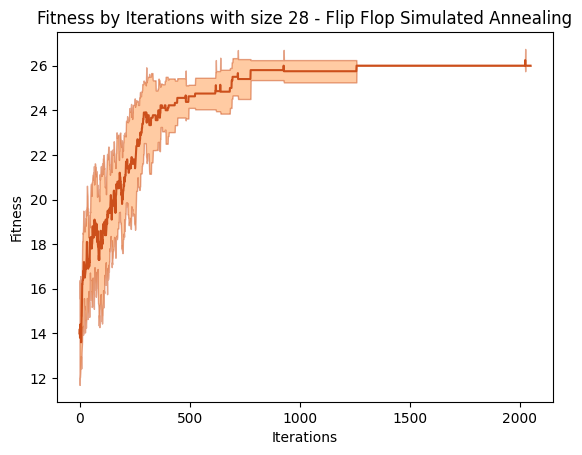

In [59]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#CC4F1B')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.title('Fitness by Iterations with size 28 - Flip Flop Simulated Annealing')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [ ]:
# Fevals - iteration

In [70]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [71]:
df_FEvals_iter_ffp.shape

(2049, 3)

In [72]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,2.0,0.000000
2,2,3.8,0.177778
3,3,5.6,0.266667
4,4,7.6,0.266667


In [73]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [74]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,2.0,0.000000,0.000000
2,2,3.8,0.177778,0.421637
3,3,5.6,0.266667,0.516398
4,4,7.6,0.266667,0.516398


Text(0, 0.5, 'Cumulative FEvals')

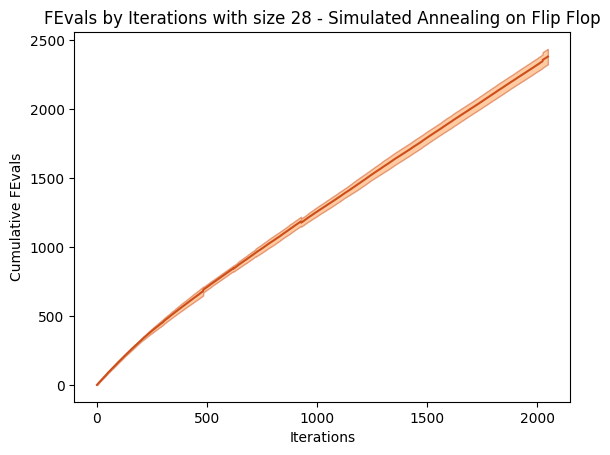

In [75]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#CC4F1B')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.title('FEvals by Iterations with size 28 - Simulated Annealing on Flip Flop')
plt.xlabel('Iterations')
plt.ylabel('Cumulative FEvals')

In [265]:
# fitness - wall clock time

In [76]:
df_iter_curves_ffp.tail()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
635,635,1.107272,25.0,854.0,2,2048
636,636,1.108173,25.0,856.0,2,2048
637,637,1.112952,25.0,857.0,2,2048
638,638,1.113941,25.0,858.0,2,2048
639,639,1.114935,27.0,860.0,2,2048


In [77]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.001154,17.0,0.0,2,2048
1,1,0.010577,17.0,2.0,2,2048
2,2,0.015395,15.0,4.0,2,2048
3,3,0.019652,17.0,6.0,2,2048
4,4,0.019880,17.0,8.0,2,2048


In [78]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [79]:
df_time_iter_ffp.shape

(2049, 3)

In [80]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.000420,7.563403e-08
1,1,0.009027,5.546903e-05
2,2,0.021698,7.682033e-05
3,3,0.032785,1.731614e-04
4,4,0.033032,1.733158e-04


In [81]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [82]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.000420,7.563403e-08,0.000275
1,1,0.009027,5.546903e-05,0.007448
2,2,0.021698,7.682033e-05,0.008765
3,3,0.032785,1.731614e-04,0.013159
4,4,0.033032,1.733158e-04,0.013165


Text(0, 0.5, 'Cumulative Time')

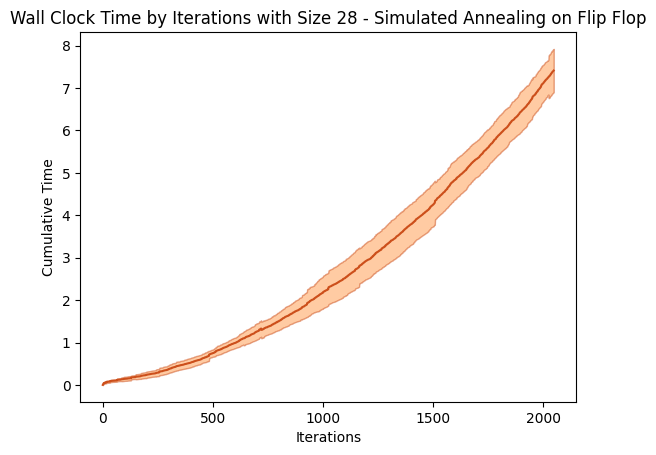

In [83]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#CC4F1B')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.title('Wall Clock Time by Iterations with Size 28 - Simulated Annealing on Flip Flop')
plt.xlabel('Iterations')
plt.ylabel('Cumulative Time')